In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['KaiTi'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

### 读取数据

In [2]:
data = pd.read_csv(r'C:\Users\lee\Desktop\log.txt',sep='\t',header=None)

In [3]:
data.columns=['id','api','count','res_time_sum','res_time_min','res_time_max','res_time_avg','interval','created_at']

In [4]:
data

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2017-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2017-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2017-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2017-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2017-11-01 00:04:07
5,162967,/front-api/bill/create,5,521.28,80.64,126.17,104.0,60,2017-11-01 00:05:07
6,163048,/front-api/bill/create,3,464.84,115.97,224.42,154.0,60,2017-11-01 00:06:07
7,163207,/front-api/bill/create,2,337.58,75.58,262.00,168.0,60,2017-11-01 00:07:07
8,163290,/front-api/bill/create,5,773.22,107.14,207.33,154.0,60,2017-11-01 00:08:07
9,163382,/front-api/bill/create,4,669.66,140.26,225.21,167.0,60,2017-11-01 00:09:07


### 检测是否有重复值

In [5]:
data[data.duplicated()==True]  #无重复值

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at


### 检测异常值

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179496 entries, 0 to 179495
Data columns (total 9 columns):
id              179496 non-null int64
api             179496 non-null object
count           179496 non-null int64
res_time_sum    179496 non-null float64
res_time_min    179496 non-null float64
res_time_max    179496 non-null float64
res_time_avg    179496 non-null float64
interval        179496 non-null int64
created_at      179496 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 12.3+ MB


In [7]:
data['res_time_sum'].describe()

count    179496.000000
mean       1393.177370
std        1499.485881
min          36.550000
25%         607.707500
50%        1154.905000
75%        1834.117500
max      142650.550000
Name: res_time_sum, dtype: float64

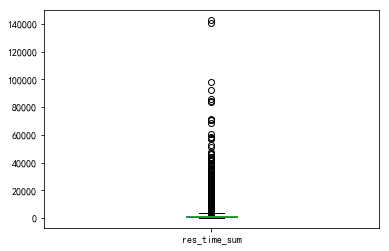

In [112]:
data['res_time_sum'].plot(kind='box')

In [116]:
data.loc[data['res_time_sum']>1834,'res_time_sum'].sort_values()

60734       1834.01
70108       1834.02
87183       1834.02
123037      1834.06
84283       1834.07
150144      1834.11
5990        1834.14
159429      1834.19
110606      1834.19
175610      1834.22
81044       1834.24
26921       1834.26
121337      1834.26
30884       1834.29
52895       1834.31
84439       1834.33
25652       1834.36
105106      1834.37
151014      1834.43
72471       1834.44
127207      1834.44
122412      1834.45
110600      1834.47
17537       1834.50
176541      1834.52
86826       1834.53
143133      1834.53
37286       1834.54
75778       1834.54
147283      1834.54
            ...    
121138     39515.03
133720     40836.04
154516     41988.60
100807     42156.84
113494     42276.42
159106     42289.27
171970     42913.85
100804     42945.44
76009      44068.25
171969     46061.58
101377     46147.69
152548     46241.21
159102     47560.71
100810     51399.50
125917     52382.56
125915     57167.23
171968     57821.70
20461      58836.12
121058     60739.26


In [117]:
44880/179496

0.2500334269287338

### 超过三分位数的数有44880个，总个数179496个，约占25%，暂不认定为异常值

In [8]:
data['res_time_min'].describe()

count    179496.000000
mean        108.419620
std          79.640559
min           3.210000
25%          83.410000
50%          97.120000
75%         116.990000
max       18896.640000
Name: res_time_min, dtype: float64

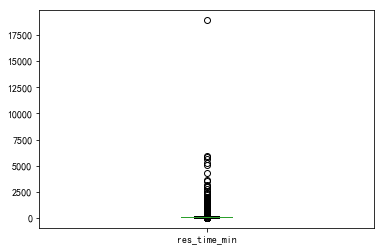

In [111]:
data['res_time_min'].plot(kind='box')

In [126]:
data[data['res_time_min'] == 18896.64].index

Int64Index([139214], dtype='int64')

### 最大值远在数据集中区域以外，这里将其认定为异常值，这行数据的索引为139214

In [9]:
data['res_time_max'].describe()

count    179496.000000
mean        359.880351
std         638.919769
min          36.550000
25%         198.280000
50%         256.090000
75%         374.410000
max      142468.270000
Name: res_time_max, dtype: float64

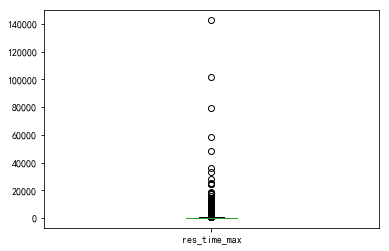

In [121]:
data['res_time_max'].plot(kind='box')

In [9]:
data['res_time_avg'].describe()

count    179496.000000
mean        187.812208
std         224.464813
min          36.000000
25%         144.000000
50%         167.000000
75%         202.000000
max       71325.000000
Name: res_time_avg, dtype: float64

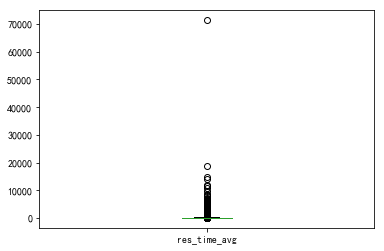

In [123]:
data['res_time_avg'].plot(kind='box')

In [125]:
data[data['res_time_avg'] == 71325].index

Int64Index([121064], dtype='int64')

### 最大值71325为异常值，其所在行索引为121064

In [10]:
data['count'].describe()

count    179496.000000
mean          7.175909
std           4.325160
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          31.000000
Name: count, dtype: float64

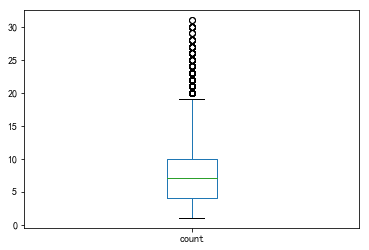

In [113]:
data['count'].plot(kind='box')

In [11]:
data['interval'].describe()

count    179496.0
mean         60.0
std           0.0
min          60.0
25%          60.0
50%          60.0
75%          60.0
max          60.0
Name: interval, dtype: float64

In [12]:
data['api'].describe()

count                     179496
unique                         1
top       /front-api/bill/create
freq                      179496
Name: api, dtype: object

### 结论：这两列没用，因为数据都是一样的，没有变化，故删之

In [13]:
data1 = data.drop(axis=1,columns=['api','interval'])

### 时间索引

In [14]:
data1

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
0,162542,8,1057.31,88.75,177.72,132.0,2017-11-01 00:00:07
1,162644,5,749.12,103.79,240.38,149.0,2017-11-01 00:01:07
2,162742,5,845.84,136.31,225.73,169.0,2017-11-01 00:02:07
3,162808,9,1305.52,90.12,196.61,145.0,2017-11-01 00:03:07
4,162943,3,568.89,138.45,232.02,189.0,2017-11-01 00:04:07
5,162967,5,521.28,80.64,126.17,104.0,2017-11-01 00:05:07
6,163048,3,464.84,115.97,224.42,154.0,2017-11-01 00:06:07
7,163207,2,337.58,75.58,262.00,168.0,2017-11-01 00:07:07
8,163290,5,773.22,107.14,207.33,154.0,2017-11-01 00:08:07
9,163382,4,669.66,140.26,225.21,167.0,2017-11-01 00:09:07


In [15]:
data1['created_at'] = pd.to_datetime(data1['created_at'].values)

In [16]:
data2 = data1.set_index('created_at')
data2

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg
created_at,,,,,,
2017-11-01 00:00:07,162542,8,1057.31,88.75,177.72,132.0
2017-11-01 00:01:07,162644,5,749.12,103.79,240.38,149.0
2017-11-01 00:02:07,162742,5,845.84,136.31,225.73,169.0
2017-11-01 00:03:07,162808,9,1305.52,90.12,196.61,145.0
2017-11-01 00:04:07,162943,3,568.89,138.45,232.02,189.0
2017-11-01 00:05:07,162967,5,521.28,80.64,126.17,104.0
2017-11-01 00:06:07,163048,3,464.84,115.97,224.42,154.0
2017-11-01 00:07:07,163207,2,337.58,75.58,262.00,168.0
2017-11-01 00:08:07,163290,5,773.22,107.14,207.33,154.0


In [17]:
data2.index

DatetimeIndex(['2017-11-01 00:00:07', '2017-11-01 00:01:07',
               '2017-11-01 00:02:07', '2017-11-01 00:03:07',
               '2017-11-01 00:04:07', '2017-11-01 00:05:07',
               '2017-11-01 00:06:07', '2017-11-01 00:07:07',
               '2017-11-01 00:08:07', '2017-11-01 00:09:07',
               ...
               '2018-05-30 23:01:21', '2018-05-30 23:02:21',
               '2018-05-30 23:03:21', '2018-05-30 23:04:21',
               '2018-05-30 23:05:21', '2018-05-30 23:06:21',
               '2018-05-30 23:07:21', '2018-05-30 23:08:21',
               '2018-05-30 23:09:21', '2018-05-30 23:10:21'],
              dtype='datetime64[ns]', name='created_at', length=179496, freq=None)

### api调用次数分析

In [18]:
data3=data2.copy()

In [19]:
data3['时间']=data3.index.time

In [20]:
data3

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,时间
created_at,,,,,,,
2017-11-01 00:00:07,162542,8,1057.31,88.75,177.72,132.0,00:00:07
2017-11-01 00:01:07,162644,5,749.12,103.79,240.38,149.0,00:01:07
2017-11-01 00:02:07,162742,5,845.84,136.31,225.73,169.0,00:02:07
2017-11-01 00:03:07,162808,9,1305.52,90.12,196.61,145.0,00:03:07
2017-11-01 00:04:07,162943,3,568.89,138.45,232.02,189.0,00:04:07
2017-11-01 00:05:07,162967,5,521.28,80.64,126.17,104.0,00:05:07
2017-11-01 00:06:07,163048,3,464.84,115.97,224.42,154.0,00:06:07
2017-11-01 00:07:07,163207,2,337.58,75.58,262.00,168.0,00:07:07
2017-11-01 00:08:07,163290,5,773.22,107.14,207.33,154.0,00:08:07


In [21]:
s1 = data3.groupby('时间')['count'].mean()
s1

时间
00:00:00    14.000000
00:00:01     6.200000
00:00:02     5.000000
00:00:03     4.333333
00:00:04     5.000000
00:00:05     4.250000
00:00:06     5.250000
00:00:07     5.250000
00:00:08     6.000000
00:00:09     4.333333
00:00:10     5.500000
00:00:11     4.500000
00:00:12     7.500000
00:00:13     5.500000
00:00:14     6.000000
00:00:15     6.500000
00:00:16     4.400000
00:00:17     7.000000
00:00:18     5.250000
00:00:19     5.666667
00:00:20     5.000000
00:00:21     5.000000
00:00:22     9.000000
00:00:23     3.750000
00:00:24     3.500000
00:00:25     3.333333
00:00:26     3.200000
00:00:27     4.000000
00:00:28     3.800000
00:00:29     5.000000
              ...    
23:59:30     3.250000
23:59:31     5.500000
23:59:32     4.400000
23:59:33     4.666667
23:59:34     3.333333
23:59:35     5.333333
23:59:36     4.500000
23:59:37     4.200000
23:59:38     5.500000
23:59:39     3.750000
23:59:40     4.000000
23:59:41     3.666667
23:59:42     5.000000
23:59:43     6.000000
23:59:4

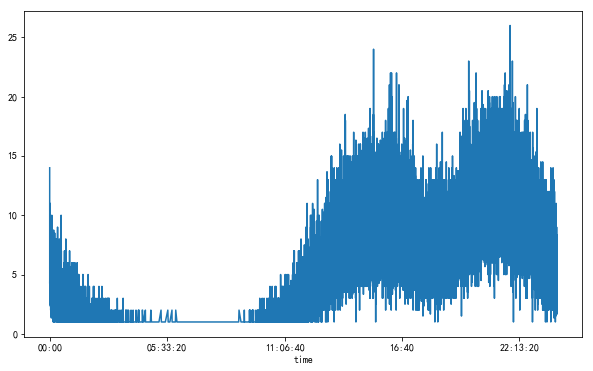

In [129]:
fig,a = plt.subplots(1,1,figsize=(10,6))
a.plot(s1.index,s1.values)
plt.show()

In [23]:
data3['hour']=data3.index.hour

In [24]:
res = data3.groupby(['hour'])['res_time_min'].mean()
res1 = data3.groupby(['hour'])['res_time_max'].mean()
res2 = data3.groupby(['hour'])['res_time_avg'].mean()

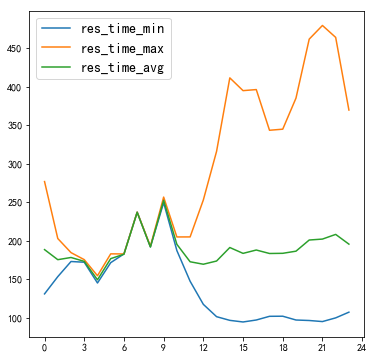

In [127]:
fig1,ase1 = plt.subplots(1,1,figsize=(6,6))
ase1.plot(res.index,res.values,label='res_time_min')
ase1.plot(res1.index,res1.values,label='res_time_max')
ase1.plot(res2.index,res2.values,label='res_time_avg')
ase1.set_xticks([0,3,6,9,12,15,18,21,24])
plt.legend(loc='best',fontsize=14)
plt.show()

In [26]:
data3['星期']=data3.index.strftime('%w')

In [27]:
set(data3['星期'].values.tolist())

{'0', '1', '2', '3', '4', '5', '6'}

In [28]:
data3.tail(5)

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,时间,hour,星期
created_at,,,,,,,,,
2018-05-30 23:06:21,13438800,11,2783.48,99.24,489.90,253.0,23:06:21,23,3
2018-05-30 23:07:21,13438866,10,1951.10,85.37,529.51,195.0,23:07:21,23,3
2018-05-30 23:08:21,13438917,3,494.17,103.95,211.47,164.0,23:08:21,23,3
2018-05-30 23:09:21,13438981,9,1798.28,101.11,433.30,199.0,23:09:21,23,3
2018-05-30 23:10:21,13439086,6,1017.97,74.45,298.97,169.0,23:10:21,23,3


### 5月1-11号每天访问情况

In [31]:
data3['month'] = data3.index.month

In [33]:
data3['day'] = data3.index.day

In [34]:
data3.head(5)

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,时间,hour,星期,month,day
created_at,,,,,,,,,,,
2017-11-01 00:00:07,162542,8,1057.31,88.75,177.72,132.0,00:00:07,0,3,11,1
2017-11-01 00:01:07,162644,5,749.12,103.79,240.38,149.0,00:01:07,0,3,11,1
2017-11-01 00:02:07,162742,5,845.84,136.31,225.73,169.0,00:02:07,0,3,11,1
2017-11-01 00:03:07,162808,9,1305.52,90.12,196.61,145.0,00:03:07,0,3,11,1
2017-11-01 00:04:07,162943,3,568.89,138.45,232.02,189.0,00:04:07,0,3,11,1


In [41]:
df = data3[data3['month']==5]
df = df[df['day']<=11]
df

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,时间,hour,星期,month,day
created_at,,,,,,,,,,,
2018-05-01 00:00:48,11406128,6,2105.08,125.74,992.46,350.0,00:00:48,0,2,5,1
2018-05-01 00:01:48,11406236,7,2579.11,76.55,987.47,368.0,00:01:48,0,2,5,1
2018-05-01 00:02:48,11406347,7,1277.79,109.65,236.73,182.0,00:02:48,0,2,5,1
2018-05-01 00:03:48,11406446,7,2137.20,131.55,920.52,305.0,00:03:48,0,2,5,1
2018-05-01 00:04:48,11406488,13,2948.70,86.42,491.31,226.0,00:04:48,0,2,5,1
2018-05-01 00:05:48,11406599,6,2463.78,137.75,1445.82,410.0,00:05:48,0,2,5,1
2018-05-01 00:06:48,11406661,6,2875.67,166.32,1304.41,479.0,00:06:48,0,2,5,1
2018-05-01 00:07:48,11406751,8,1764.17,93.63,425.96,220.0,00:07:48,0,2,5,1
2018-05-01 00:08:48,11406812,8,2577.12,148.68,864.03,322.0,00:08:48,0,2,5,1


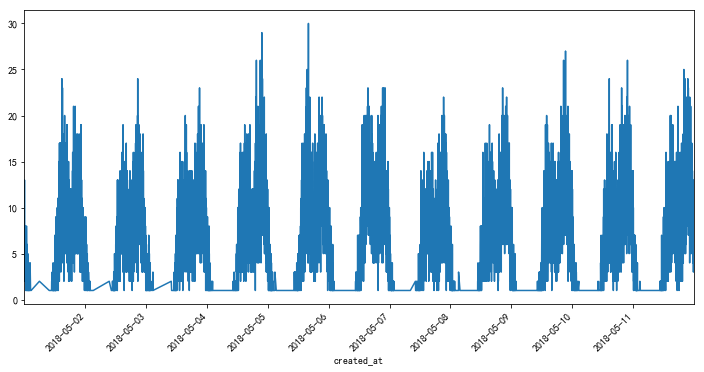

In [53]:
fig2,ase2 = plt.subplots(1,1,figsize=(12,6))
df['count'].plot(kind='line',rot=45)
plt.show()

### 结论：每天的业务高峰时段相似

### 周末的访问量情况与非周末的对比

In [87]:
daf = data3[data3['星期'].isin(['6','0'])]
daf

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,时间,hour,星期,month,day
created_at,,,,,,,,,,,
2017-11-04 00:00:13,402263,6,702.67,87.75,176.42,117.0,00:00:13,0,6,11,4
2017-11-04 00:01:13,402374,6,802.94,71.82,204.16,133.0,00:01:13,0,6,11,4
2017-11-04 00:02:13,402460,6,1081.19,128.20,255.86,180.0,00:02:13,0,6,11,4
2017-11-04 00:03:13,402555,5,790.92,84.55,270.43,158.0,00:03:13,0,6,11,4
2017-11-04 00:04:13,402590,7,1167.43,81.83,229.93,166.0,00:04:13,0,6,11,4
2017-11-04 00:05:13,402682,3,483.54,84.07,214.01,161.0,00:05:13,0,6,11,4
2017-11-04 00:06:13,402758,5,872.71,120.12,279.04,174.0,00:06:13,0,6,11,4
2017-11-04 00:07:13,402901,1,275.88,275.88,275.88,275.0,00:07:13,0,6,11,4
2017-11-04 00:08:13,402972,7,954.09,96.37,175.59,136.0,00:08:13,0,6,11,4


In [88]:
zm = daf.groupby('hour')['count'].mean()
zm

hour
0      3.734308
1      1.817551
2      1.149606
3      1.075758
4      1.000000
5      1.166667
6      1.000000
7      1.000000
8      1.090909
9      1.056338
10     1.253294
11     1.910992
12     3.572730
13     7.358687
14     9.821528
15    11.055741
16    10.587842
17     8.274307
18     7.726024
19     9.476576
20    11.275718
21    11.399721
22     9.550251
23     6.264972
Name: count, dtype: float64

In [93]:
dbf = data3[~data3.星期.isin(['0','6'])]
dbf

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,时间,hour,星期,month,day
created_at,,,,,,,,,,,
2017-11-01 00:00:07,162542,8,1057.31,88.75,177.72,132.0,00:00:07,0,3,11,1
2017-11-01 00:01:07,162644,5,749.12,103.79,240.38,149.0,00:01:07,0,3,11,1
2017-11-01 00:02:07,162742,5,845.84,136.31,225.73,169.0,00:02:07,0,3,11,1
2017-11-01 00:03:07,162808,9,1305.52,90.12,196.61,145.0,00:03:07,0,3,11,1
2017-11-01 00:04:07,162943,3,568.89,138.45,232.02,189.0,00:04:07,0,3,11,1
2017-11-01 00:05:07,162967,5,521.28,80.64,126.17,104.0,00:05:07,0,3,11,1
2017-11-01 00:06:07,163048,3,464.84,115.97,224.42,154.0,00:06:07,0,3,11,1
2017-11-01 00:07:07,163207,2,337.58,75.58,262.00,168.0,00:07:07,0,3,11,1
2017-11-01 00:08:07,163290,5,773.22,107.14,207.33,154.0,00:08:07,0,3,11,1


In [94]:
ps = dbf.groupby('hour')['count'].mean()
ps

hour
0      3.128067
1      1.630455
2      1.169133
3      1.077844
4      1.177778
5      1.157895
6      1.000000
7      1.000000
8      1.000000
9      1.130081
10     1.239251
11     2.063804
12     4.371090
13     6.486743
14     7.871789
15     8.456582
16     7.997661
17     6.407690
18     6.563842
19     8.571731
20    10.495051
21    10.963392
22     9.378861
23     6.250367
Name: count, dtype: float64

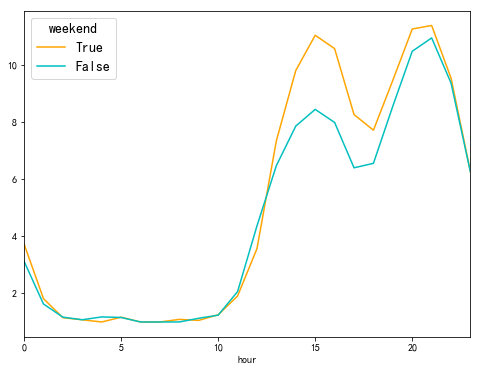

In [130]:
zm.plot(kind='line',color='orange',label='True',figsize=(8,6))
ps.plot(kind='line',color='c',label='False')
plt.legend(loc='best',title='weekend',fontsize=14,title_fontsize=14)
plt.show()

### 结论：周末的下午和晚上比非周末的访问次数多一些